# Neural Network in Numpy - a warmup

The **problem** is a regression problem, where the neural net is set to approximate the underlying function of our training data.

The **training data** will be a limited set of datapoints sampled from a function specified below.

**The objectives** in terms of Bayes when it comes to the construction of this neural network, is to:
* make the ML and MAP estimations explicit
* promote the neural net in its role as a universal function approximator
* find potential accesspoints for posterior inference and formulate a model specification or an approximation strategy
* perform calculations of the the selected posterior distribution
* overlay some key insights in art

**Table of content:**

1. generate training data
2. define NN 
3. scalar loss
4. backpropagation
5. train NN
5. inference
6. define Baysean access points and formulate model specifications
7. variational approximation / gaussian process / other approximation method
8. train NN + calculate posterior distribution
9. plot results and insights

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 - Generate training data

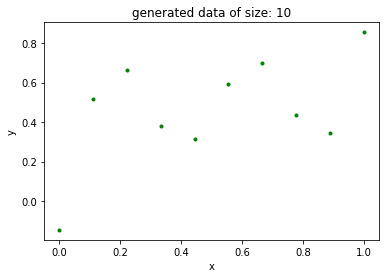

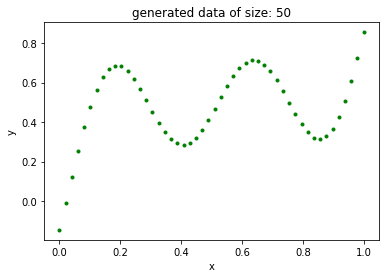

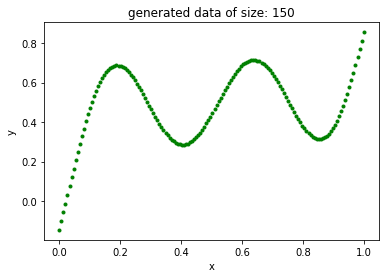

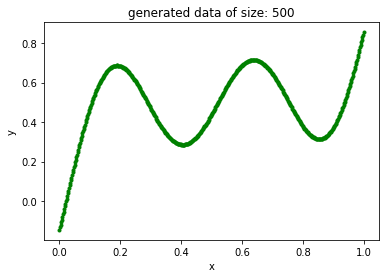

Size of training data: 10


In [161]:
# For plotting
for_plotting = (10, 50, 150, 500)
noise_data = np.random.normal(0, 0.02)
for plotting in for_plotting:
    X = np.linspace(0, 1, plotting)
    plottings = list()
    for x in X:
        plottings.append(x + 0.3*np.sin(2*np.pi*(x + noise_data)) + 0.3*np.sin(4*np.pi*(x + noise_data)) + noise_data) 
    plt.title('generated data of size: ' + str(plotting))
    plt.plot(X, plottings, 'g.')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
# For data
n = 1000
X = np.linspace(0, 1, n)
def gen_Y(X):
    data = list()
    for x_ in x:
        data.append(x_ + 0.3*np.sin(2*np.pi*(x_ + noise_data)) + 0.3*np.sin(4*np.pi*(x_ + noise_data)) + noise_data)
    return np.array(data)
print('Size of training data:', len(data))

## 2 - Define neural network


We will make the network such that it is capable of making one feedforward step and output an $Y_{pred}$ vector of size $n$.

The network will consist of an input layer $X$, one hidden layer $H$, which consist of an affine transformation $o$ and one non-linear activation $a$. The output layer is the predictions $Y_{pred}$. Their composite structure can be displayed as follows:

$$Y_{pred} = H(X) = a(o(X))$$

Here are the network dimensions:
* Input: $X$ is an $n$ dimensional vector
* Weights: $W$ is an $n$x$n$ matrix
* Bias: $B$ is an n dimensional vector
* Activation: ReLU is an $n$ dimensional element-wise activation function
* Output: $Y_{pred}$ is an $n$ dimensional vector

In [144]:
y_true = gen_Y(X)
W = np.random.normal(size=(n, n))
B = np.random.normal(size=n)
# Affine transformation
o = np.add(np.matmul(W, X), B)
# Activation
a = np.maximum(o, 0)
# Output
y_pred = a
y_pred

array([ 0.        ,  0.        ,  7.99998632,  0.        ,  0.        ,
        0.        ,  3.53245566, 12.55974023,  4.99144598,  0.        ,
        0.        ,  0.        ,  3.57732753,  2.41617742,  0.        ,
        0.        ,  8.30951838,  6.62473288,  8.17268029,  2.02649094,
        0.        ,  0.        ,  3.74893815,  0.38850575,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  7.28103232,
       14.12035803,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.59716466,  1.28975939,  0.        ,  0.        ,
        0.        ,  3.91937295,  0.        ,  5.87692986,  0.        ,
        7.93504302,  0.        ,  0.        , 11.37619073,  0.        ,
        3.4944869 ,  0.18547431,  0.        ,  0.26509157,  2.85959801,
        6.95217202,  0.        ,  1.85642143,  0.        ,  8.45768593,
        0.5488741 ,  0.        ,  0.47183311,  3.9721185 ,  3.79526464,
        0.        ,  7.58185842,  3.16338524,  0.89637732,  0.  

## 3 - Mean squared error

Consider the $Y_{pred}$ output to be described as the conditional probability given the input and parameters as follows:

$$Y_{pred} = P(Y|X, w, b)$$ 

The scalar loss of this prediction is mean squared error:

$$MSE = \frac{1}{n}\sum^n_{i = 1} (Y^{true}_{i} - Y^{pred}_{i})^2$$ 

In [145]:
errors = y_true - y_pred
mse = np.sum(np.square(np.subtract(y_true, y_pred))) / n
J = np.sum(np.square(np.subtract(np.log(y_true + 1), np.log(y_pred + 1)))) / n
print('MSE:', round(mse, 4))
print('J loss:', round(J, 4))

MSE: 14.932
J loss: 0.9608


## 4 - Backpropagation

We are looking to upgrade the parameters by finding the gradient of the loss function with respect to the parameters:

$\theta_{k + 1} = \theta_k - \alpha * \frac{\partial J}{\partial \theta_k}$

Where \alpha is the step-size learning rate, and where \theta is the parameters which in this case is the weights $W$ and bias $B$. Hence that gives:

$W_{k + 1} = W_k - \alpha * \frac{\partial J}{\partial W}$

$B_{k + 1} = B_k - \alpha * \frac{\partial J}{\partial B}$

We obtain these derivatives by applying the chain rule of partial derivatives:

$\frac{\partial J}{\partial W} = \frac{\partial J}{\partial a}\frac{\partial a}{\partial o}\frac{\partial o}{\partial W}$

$\frac{\partial J}{\partial B} = \frac{\partial J}{\partial a}\frac{\partial a}{\partial o}\frac{\partial o}{\partial B}$

In [146]:
J_a = np.sum(np.square(np.subtract(y_true, y_pred))) * 2 / n
a_o = np.array([1 if i > 0 else 0 for i in o])
o_w = X
o_b = 1
J_w = np.dot(J_a, a_o).dot(o_w)
J_b = np.dot(J_a, a_o).dot(o_b)
W_update = W - 0.1 * J_w
B_update = B - 0.1 * J_b
print('mean W:', np.mean(W))
print('mean updated_W:', np.mean(W_update))
print('mean B:', np.mean(B))
print('mean updated_B:', np.mean(B_update))

mean W: -0.009291726574060157
mean updated_W: -74.94067283841675
mean B: -0.2141923557954543
mean updated_B: -1.6476622553263574


## 5 - Train NN

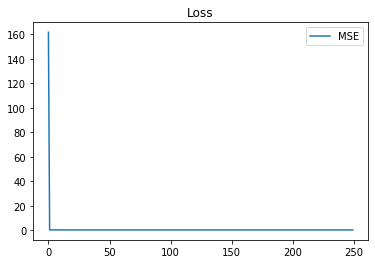

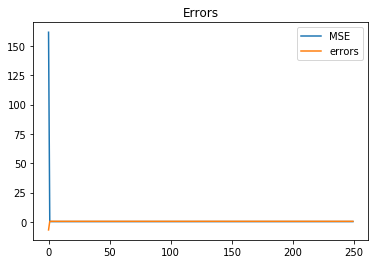

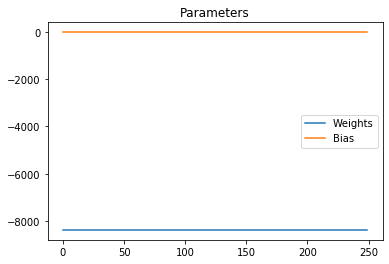

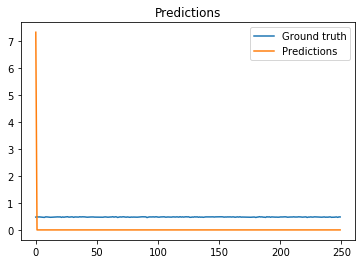

In [214]:
learning_rate = 0.00001
training_steps = range(5000)
batchsize = 1000
WW = list()
BB = list()
Y_true = list()
Y_pred = list()
Errors = list()
MSE = list()
W = np.random.normal(size=(batchsize, batchsize))
B = np.random.normal(size=batchsize)
for step in training_steps:
    # Forward prop
    x = np.array([X[np.random.randint(0, len(X))] for i in range(batchsize)])
    y_true = gen_Y(x)
    o = np.add(np.matmul(W, x), B)
    y_pred = a = np.maximum(o, 0)
    # Loss
    errors = y_true - y_pred
    mse = np.sum(np.square(np.subtract(y_true, y_pred))) / n
    # Backprop
    J_a = np.sum(np.square(np.subtract(y_true, y_pred))) * 2 / n
    a_o = np.array([1 if i > 0 else 0 for i in o])
    o_w = x
    o_b = 1
    J_w = np.dot(J_a, a_o).dot(o_w)
    J_b = np.dot(J_a, a_o).dot(o_b)
    W = W - 0.1 * J_w
    B = B - 0.1 * J_b
    if step % 20 == 0:
        WW.append(np.mean(W))
        BB.append(np.mean(B))
        Y_true.append(np.mean(y_true))
        Y_pred.append(np.mean(y_pred))
        Errors.append(errors)
        MSE.append(mse)

plt.title('Loss')
plt.plot(MSE, label='MSE')
plt.legend(loc='best')
plt.show()

plt.title('Errors')
plt.plot(MSE, label='MSE')
plt.plot(np.mean(Errors, axis=1), label='errors')
plt.legend(loc='best')
plt.show()

plt.title('Parameters')
plt.plot(WW, label='Weights')
plt.plot(BB, label='Bias')
plt.legend(loc='best')
plt.show()

plt.title('Predictions')
plt.plot(Y_true, label='Ground truth')
plt.plot(Y_pred, label='Predictions')
plt.legend(loc='best')
plt.show()

## 6 - Inference

Given a set of X, predict the corresponding Y. Plot it next to the real data corresponding to same set of X.

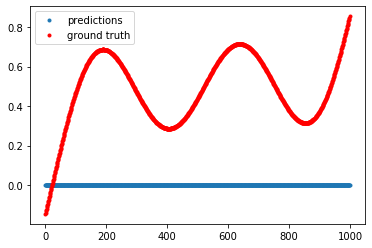

In [215]:
x = np.linspace(0, 1, batchsize)
y_true = gen_Y(x)
y_pred = np.maximum(np.add(np.matmul(W, x), B), 0)
plt.plot(y_pred, '.', label='predictions')
plt.plot(y_true, 'r.', label='ground truth')
plt.legend(loc='best')
plt.show()

So there are some problems with this network. To be continued in the next notebook.